# Bank Customer Churn Prediction

## Approach

I will start by loading and exploring the dataset, performing data preprocessing, and conducting exploratory data analysis (EDA) to gain insights into the data. Then, I will experiment with different machine learning algorithms and techniques to build predictive models. Additionally, I will explore the potential benefits of incorporating the original dataset into the training process to improve model performance.

## Files

- `train.csv`: Training dataset with the binary target variable "Exited"
- `test.csv`: Test dataset for prediction
- `sample_submission.csv`: Sample submission file in the correct format

Let's dive into the analysis and model development!


# Import Libraries and Load Data

In [3]:
import pandas as pd
import numpy as np 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
%matplotlib inline

In [4]:
source_churn_df = pd.read_csv('CSV Data/Churn_Modelling.csv')
synthesis_churn_df = pd.read_csv('CSV Data/train.csv')
raw_test_df = pd.read_csv('CSV Data/test.csv')

print(f"source_churn_df shape: {source_churn_df.shape}")
print(f"synthesis_churn_df shape: {synthesis_churn_df.shape}")
print(f"raw_test_df shape: {raw_test_df.shape}")

source_churn_df shape: (10002, 14)
synthesis_churn_df shape: (165034, 14)
raw_test_df shape: (110023, 13)


# Data Merging and Exploration

In [5]:
# Drop Unnecessary Columns

reduced_source_df = source_churn_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
reduced_synthesis_df = synthesis_churn_df.drop(['id', 'CustomerId', 'Surname'], axis=1)
reduced_test_df = raw_test_df.drop(['id', 'CustomerId', 'Surname'], axis=1)
reduced_synthesis_df

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0               668    France    Male  33.0       3       0.00              2   
1               627    France    Male  33.0       1       0.00              2   
2               678    France    Male  40.0      10       0.00              2   
3               581    France    Male  34.0       2  148882.54              1   
4               716     Spain    Male  33.0       5       0.00              2   
...             ...       ...     ...   ...     ...        ...            ...   
165029          667     Spain  Female  33.0       2       0.00              1   
165030          792    France    Male  35.0       3       0.00              1   
165031          565    France    Male  31.0       5       0.00              1   
165032          554     Spain  Female  30.0       7  161533.00              1   
165033          850    France    Male  31.0       1       0.00              1   

        HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1.0             0.0        181449.97       0  
1             1.0             1.0         49503.50       0  
2             1.0             0.0        184866.69       0  
3             1.0             1.0         84560.88       0  
4             1.0             1.0         15068.83       0  
...           ...             ...              ...     ...  
165029        1.0             1.0        131834.75       0  
165030        0.0             0.0        131834.45       0  
165031        1.0             1.0        127429.56       0  
165032        0.0             1.0         71173.03       0  
165033        1.0             0.0         61581.79       1  

[165034 rows x 11 columns]

In [6]:
# Merge synthesis df and source df for better prediction

merged_df = pd.merge(reduced_synthesis_df, reduced_source_df, how='outer')
print(f"merged_df shape: {merged_df.shape}")
merged_df.isnull().sum()

merged_df shape: (174590, 11)


CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# Drop rows with missing values

merged_df.dropna(inplace=True)
print(f"merged_df shape: {merged_df.shape}")
merged_df.isnull().sum()

merged_df shape: (174586, 11)


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
merged_df.describe().T

count           mean           std     min       25%  \
CreditScore      174586.0     656.109911     81.121546  350.00    597.00   
Age              174586.0      38.174188      8.967579   18.00     32.00   
Tenure           174586.0       5.019750      2.811024    0.00      3.00   
Balance          174586.0   56635.984111  62976.558142    0.00      0.00   
NumOfProducts    174586.0       1.553217      0.549271    1.00      1.00   
HasCrCard        174586.0       0.751326      0.432246    0.00      1.00   
IsActiveMember   174586.0       0.498637      0.500000    0.00      0.00   
EstimatedSalary  174586.0  111886.291827  50794.570851   11.58  73322.02   
Exited           174586.0       0.211443      0.408333    0.00      0.00   

                       50%        75%        max  
CreditScore         659.00     710.00     850.00  
Age                  37.00      42.00      92.00  
Tenure                5.00       7.00      10.00  
Balance               0.00  120718.28  250898.09  
NumOfProducts         2.00       2.00       4.00  
HasCrCard             1.00       1.00       1.00  
IsActiveMember        0.00       1.00       1.00  
EstimatedSalary  116971.05  154767.34  199992.48  
Exited                0.00       0.00       1.00

In [9]:
merged_df.nunique()

CreditScore          460
Geography              3
Gender                 2
Age                   73
Tenure                11
Balance            30239
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    55581
Exited                 2
dtype: int64

# Data Visualization

In [10]:
# Customizing some default Settings as my preference

# Customize default style
sns.set_style('darkgrid')

# Runtime Configuration Parameters
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6) 
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [11]:
import warnings
warnings.filterwarnings("ignore", message="When grouping with a length-1 list-like")

# Histogram for Bank Churn Based on Geography
px.histogram(merged_df,
             x='Geography',
             title='Bank Churn Based on Geography',
             color='Exited')

In [12]:
plotly.offline.init_notebook_mode (connected = True)

In [13]:
# Histogram 
px.histogram(merged_df,
             x='Gender',
             title='Bank Churn Based on Gender',
             color='Exited')

In [14]:
# Scatter Plot for Correlation between Credit Score and Estimated Salary
px.scatter(merged_df.sample(1500),
           x='EstimatedSalary',
           color='Exited',
           title='Correlation between Credit Score and Estimated Salary',
           y='CreditScore')

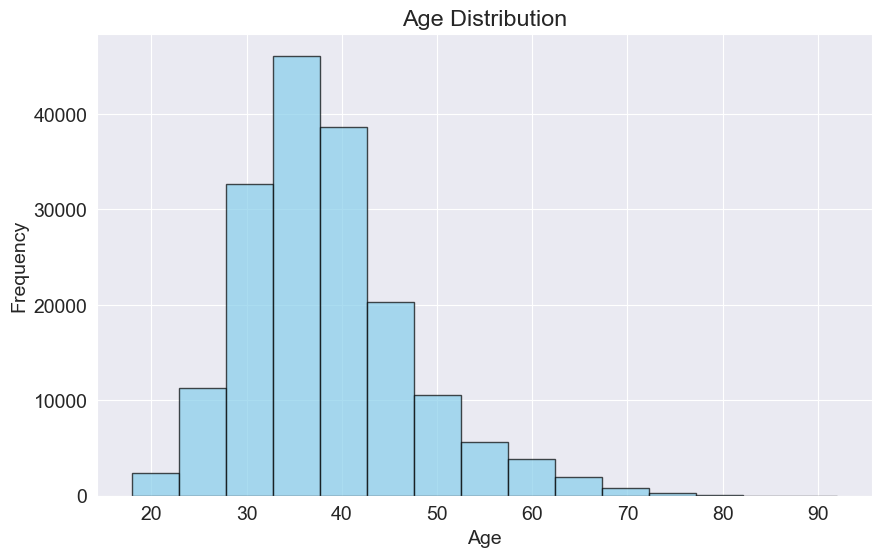

In [15]:
# Create a histogram to visualize the age distribution
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Age'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True)
plt.show()

As you can see, most people ranges from 30 to 40 years

# Data Preporcessing

In [16]:
# Encoding

# Encoding for Training Data
train_encoded_df = pd.get_dummies(merged_df)
# Encoding for Test Data
test_inputs = pd.get_dummies(reduced_test_df)

In [17]:
# Separating training inputs and training targets

print(f"encoded_df shape: {train_encoded_df.shape}")

train_inputs = train_encoded_df.drop(['Exited'], axis=1)
train_targets = train_encoded_df['Exited']

print(f"train_inputs shape: {train_inputs.shape}")
print(f"train_inputs: {list(train_inputs.columns)})")

print(f"train_targets shape: {train_targets.shape}")

encoded_df shape: (174586, 14)
train_inputs shape: (174586, 13)
train_inputs: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'])
train_targets shape: (174586,)


In [18]:
# Scaling 

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit the scaler on the training inputs
minmax_scaler.fit(train_inputs)

# Transform the numeric columns into scaled (0 to 1) columns
train_inputs[train_inputs.columns] = minmax_scaler.transform(train_inputs)
test_inputs[test_inputs.columns] = minmax_scaler.transform(test_inputs)


train_inputs

CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0             0.636  0.202703     0.3  0.000000       0.333333        1.0   
1             0.554  0.202703     0.1  0.000000       0.333333        1.0   
2             0.656  0.297297     1.0  0.000000       0.333333        1.0   
3             0.462  0.216216     0.2  0.593398       0.000000        1.0   
4             0.732  0.202703     0.5  0.000000       0.333333        1.0   
...             ...       ...     ...       ...            ...        ...   
174585        0.718  0.243243     0.7  0.000000       0.000000        0.0   
174586        0.844  0.324324     0.3  0.299226       0.333333        1.0   
174587        0.844  0.324324     0.3  0.299226       0.333333        1.0   
174588        0.884  0.135135     0.4  0.518708       0.000000        1.0   
174589        0.884  0.135135     0.4  0.518708       0.000000        1.0   

        IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0                  0.0         0.907279               1.0                0.0   
1                  1.0         0.247483               1.0                0.0   
2                  0.0         0.924364               1.0                0.0   
3                  1.0         0.422787               1.0                0.0   
4                  1.0         0.075293               0.0                0.0   
...                ...              ...               ...                ...   
174585             1.0         0.210390               1.0                0.0   
174586             0.0         0.464429               0.0                1.0   
174587             0.0         0.464429               0.0                1.0   
174588             0.0         0.190914               1.0                0.0   
174589             0.0         0.190914               1.0                0.0   

        Geography_Spain  Gender_Female  Gender_Male  
0                   0.0            0.0          1.0  
1                   0.0            0.0          1.0  
2                   0.0            0.0          1.0  
3                   0.0            0.0          1.0  
4                   1.0            0.0          1.0  
...                 ...            ...          ...  
174585              0.0            1.0          0.0  
174586              0.0            0.0          1.0  
174587              0.0            0.0          1.0  
174588              0.0            1.0          0.0  
174589              0.0            1.0          0.0  

[174586 rows x 13 columns]

In [19]:
train_targets

0         0
1         0
2         0
3         0
4         0
         ..
174585    1
174586    1
174587    1
174588    0
174589    0
Name: Exited, Length: 174586, dtype: int64

# Split Data Into Train and Validation Set

In [20]:
from sklearn.model_selection import train_test_split

validation_size = 0.3
# Splitting the data into training and testing sets
x_train, x_val, y_train, y_val = train_test_split(train_inputs, 
                                                  train_targets, 
                                                  test_size=validation_size, 
                                                  random_state=42)

print(f"x_train shape: {x_train.shape}")
print(f"y_trian shape: {y_train.shape}")
print()
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")
print()
print(f"test_df shape: {test_inputs.shape}")

x_train shape: (122210, 13)
y_trian shape: (122210,)

x_val shape: (52376, 13)
y_val shape: (52376,)

test_df shape: (110023, 13)


# Try Differenct Models

In [21]:
# Helper Function to fit and evaluate the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

def fit_and_evaluate_model(model, input_train, target_train, input_val, traget_val):
    # Fit the model to the training data
    model.fit(input_train, target_train)
    
    # Make predictions on the training set
    train_prediction = model.predict(input_train)
    train_pred_proba = model.predict_proba(input_train)[:, 1]

    # Make predictions on the validation set
    y_pred = model.predict(input_val)
    y_pred_proba = model.predict_proba(input_val)[:, 1]
    
    # Calculate evaluation metrics for validation
    train_accuracy = np.round(accuracy_score(target_train, train_prediction), 3)
    train_precision = np.round(precision_score(target_train, train_prediction), 3)
    train_recall = np.round(recall_score(target_train, train_prediction), 3)
    train_f1 = np.round(f1_score(target_train, train_prediction), 3)
    train_roc_auc = np.round(roc_auc_score(target_train, train_pred_proba), 3)

    # Calculate evaluation metrics for validation
    accuracy = np.round(accuracy_score(traget_val, y_pred), 3)
    precision = np.round(precision_score(traget_val, y_pred), 3)
    recall = np.round(recall_score(traget_val, y_pred), 3)
    f1 = np.round(f1_score(traget_val, y_pred), 3)
    roc_auc = np.round(roc_auc_score(traget_val, y_pred_proba), 3)
    
    
    # Print metrics for Training Data
    print('For Training Data:')
    print("     Accuracy:", train_accuracy)
    print("     Precision:", train_precision)
    print("     Recall:", train_recall)
    print("     F1 Score:", train_f1)
    print("     ROC AUC Score:", train_roc_auc)
    print()


    # Print metrics for Validation Data
    print('For Validation Data:')
    print("     Accuracy:", accuracy)
    print("     Precision:", precision)
    print("     Recall:", recall)
    print("     F1 Score:", f1)
    print("     ROC AUC Score:", roc_auc)
    
    # Return the fitted model
    return model

## Logistic Regression as a Baseline Model

In [22]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()

fit_and_evaluate_model(logit_model, x_train, y_train, x_val, y_val)

For Training Data:
     Accuracy: 0.832
     Precision: 0.694
     Recall: 0.374
     F1 Score: 0.486
     ROC AUC Score: 0.815

For Validation Data:
     Accuracy: 0.832
     Precision: 0.685
     Recall: 0.374
     F1 Score: 0.484
     ROC AUC Score: 0.812


LogisticRegression()

## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

decison_tree = DecisionTreeClassifier(criterion='entropy', 
                                      max_depth=10, 
                                      max_features='sqrt', 
                                      min_samples_leaf=4,
                                      min_samples_split=2,  
                                      random_state=42)

fit_and_evaluate_model(decison_tree, x_train, y_train, x_val, y_val)

For Training Data:
     Accuracy: 0.855
     Precision: 0.734
     Recall: 0.497
     F1 Score: 0.592
     ROC AUC Score: 0.88

For Validation Data:
     Accuracy: 0.85
     Precision: 0.709
     Recall: 0.486
     F1 Score: 0.577
     ROC AUC Score: 0.867


DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=4, random_state=42)

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100,
                                             criterion='entropy',
                                             max_depth=7,
                                             min_samples_split=7,
                                             min_samples_leaf=3,
                                             max_features='sqrt',
                                             )

fit_and_evaluate_model(random_forest_model, x_train, y_train, x_val, y_val)

For Training Data:
     Accuracy: 0.856
     Precision: 0.796
     Recall: 0.429
     F1 Score: 0.558
     ROC AUC Score: 0.884

For Validation Data:
     Accuracy: 0.856
     Precision: 0.79
     Recall: 0.432
     F1 Score: 0.559
     ROC AUC Score: 0.883


RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       min_samples_split=7)

### XGBoost Classifer

In [25]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(n_estimators=100,
                              max_depth=4,
                             )
fit_and_evaluate_model(xgboost_model, x_train, y_train, x_val, y_val)

For Training Data:
     Accuracy: 0.869
     Precision: 0.756
     Recall: 0.565
     F1 Score: 0.647
     ROC AUC Score: 0.896

For Validation Data:
     Accuracy: 0.867
     Precision: 0.744
     Recall: 0.561
     F1 Score: 0.64
     ROC AUC Score: 0.89


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Finally, I am on the decision that the prediction can't be more than 90 percent. It can be done better using some feature engineering and other hypertuning parameters. But 90% prediction is way good for a machine learning model! I am taking XGboost for test prediction. 

# Train the Model

In [26]:
xgboost_model = XGBClassifier(n_estimators=100,
                              max_depth=4,
                             )

xgboost_model = xgboost_model.fit(x_train, y_train)

predict_proba = np.round(xgboost_model.predict_proba(test_inputs), 5)
predict_proba

array([[0.97   , 0.03   ],
       [0.21718, 0.78282],
       [0.97662, 0.02338],
       ...,
       [0.98099, 0.01901],
       [0.86108, 0.13892],
       [0.81722, 0.18278]], dtype=float32)

# Submission

In [27]:
submission_df = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')
submission_df['Exited'] = predict_proba[:, 1]
submission_df.to_csv('/kaggle/working//submission.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/playground-series-s4e1/sample_submission.csv'

# Feature that Matters

In [ ]:
feature_importance_df = pd.DataFrame({ 
    'feature': x_train.columns, 
    'importance': xgboost_model.feature_importances_
}).sort_values('importance', ascending=False)
feature_importance_df

feature  importance
4       NumOfProducts    0.370088
6      IsActiveMember    0.244201
1                 Age    0.145229
9   Geography_Germany    0.094692
11      Gender_Female    0.083763
3             Balance    0.026471
5           HasCrCard    0.008701
0         CreditScore    0.006024
10    Geography_Spain    0.005533
8    Geography_France    0.005312
7     EstimatedSalary    0.005039
2              Tenure    0.004947
12        Gender_Male    0.000000

<Axes: xlabel='importance', ylabel='feature'>

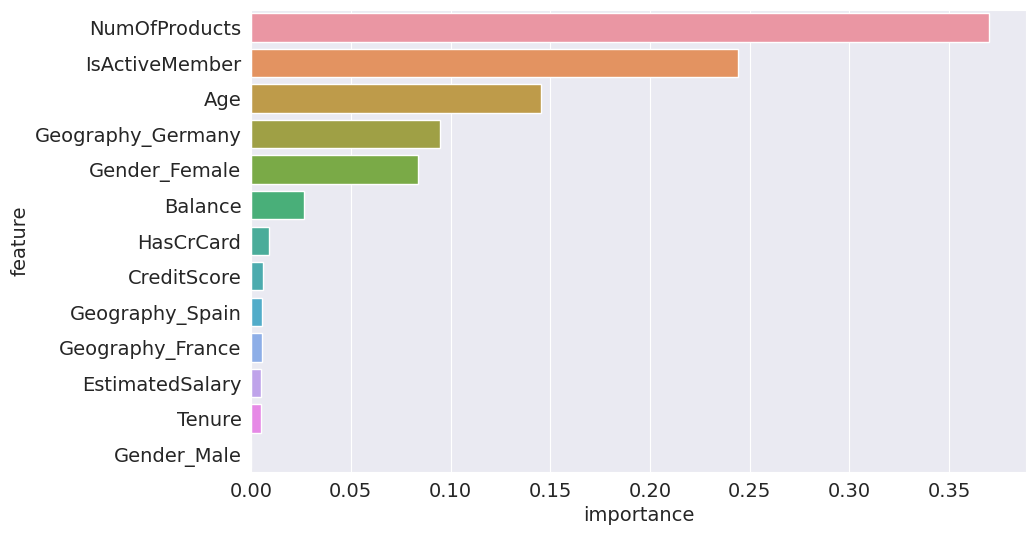

In [ ]:
sns.barplot(data=feature_importance_df, x='importance', y='feature')

# Conclusion

In this notebook, I explored the Bank Customer Churn Prediction dataset and developed machine learning models to predict customer churn. After thorough analysis and model development, I have gained valuable insights into the factors influencing customer churn.

## Key Findings

### Feature Importance

Based on our analysis, the following features have been identified as the most important predictors of customer churn:

1. **NumOfProducts**: The number of products held by the customer appears to be the most influential factor, indicating that customers with more products are more likely to churn.
2. **IsActiveMember**: The activity status of the customer plays a significant role, with inactive members more likely to churn compared to active members.
3. **Age**: Age also emerges as an important predictor, suggesting that older customers may be less likely to churn.
4. **Geography_Germany**: Customers located in Germany are more prone to churn compared to those in other geographical locations.
5. **Gender_Female**: Female customers are slightly more likely to churn compared to male customers.
6. **Balance**: The balance in the customer's account also contributes to churn prediction, albeit to a lesser extent.

## Recommendations

Based on these findings, the following recommendations can be made to reduce customer churn:

- **Engage Inactive Members**: Implement strategies to engage inactive members and encourage them to use the bank's products and services more actively.
- **Personalized Marketing**: Tailor marketing campaigns based on customer demographics and geographical locations to address specific churn risk factors.
- **Improve Customer Experience**: Focus on improving the overall customer experience, particularly for customers in Germany, to reduce churn rates.

By leveraging these insights and recommendations, banks can proactively address customer churn and enhance customer retention strategies.

Thank you for following along with this analysis!
